# Генерация текста с помощью LSTM рекуррентных нейронных сетей в Python с Keras

## Сбор данных

Датасет будет составляться из слоганов найденных в интернете + наборы данных с сайта Kaggle

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import re
import pandas as pd
import re
import ftfy

In [12]:
# Отправка GET-запроса и получение HTML-контента страницы
url = 'https://samplemessages.expertscolumn.com/top-100-witty-and-creative-advertising-slogans-and-taglines'
response = requests.get(url)
html = response.content

# Создание объекта BeautifulSoup для парсинга HTML
soup = BeautifulSoup(html, 'html.parser')

In [13]:
# Сбор строк из тега li в массив
slogans = []
for li_tag in soup.select('li'):
    slogan = li_tag.text.split('-', 1)[0].strip()
    slogans.append(slogan)

for slogan in slogans:
    print(slogan)

Love Quotes
Thank You Messages
Inspirational Quotes
Friendship Messages
Birthday Wishes
Greetings
Moment Quotes
Anniversary Wishes
Invitation Messages
Congratulation Messages
Good Morning Messages
Miss You Messages
Appreciation Messages
Condolence Wishes
Sorry Messages
Get Well Messages
Goodbye Quotes
Festival Wishes
HOME
Appreciation Messages
Category :Appreciation Messages
“Just Do It”
“A Diamond is Forever”
“I’m Lovin’ It”
“Have a Break, Have a Kit Kat”
“Snap! Crackle! Pop!”
“Because You’re Worth It”
“Finger Lickin’ Good”
“It Keeps Going, and Going, and Going...”
“Be The First to Know”
“It Gives You Wiiiings!”
“The World’s Local Bank”
“Betcha Can't Eat Just One.”
“It's Everywhere You Want to Be.”
“Think Different”
“Ideas for Life”
“Let's Make Things Better”
“It's More Than Just Oil. It's Liquid Engineering”
“Taste the Rainbow”
“The Make Up of Make Up Artists”
“Don't Leave Home without It.” American Express
“Have it Your Way”
“Grace, Space, Pace”
“What’s the Worst That Could Happen?”

In [14]:
# Запись данных в файл
filename = 'datasets\\slogans.txt'
with open(filename, 'w', encoding='utf-8') as file:
    for slogan in slogans:
        file.write(slogan + '\n')

In [15]:
# Очистка от лишних символов
input_file = 'datasets\\slogans.txt'
output_file = 'datasets\\clean_slogans.txt'


with open(input_file, 'r', encoding='utf-8') as file:
    slogans = file.read()

clean_slogans = re.sub(r'[^a-zA-Z\s]', '', slogans).lower()
clean_slogans = re.sub(r'\n+', '\n', clean_slogans)

with open(output_file, 'w', encoding='utf-8') as file:
    file.write(clean_slogans)

print("Результаты успешно записаны в файл", output_file)

Результаты успешно записаны в файл datasets\clean_slogans.txt


### Первый набор слоганов готов

В наборе данных скачанном с Kaggle присутствует неправильная кодировка, а так же лишние символы которые необходимо убрать

In [16]:
input_file = 'datasets\\1.csv'
output_file = 'datasets\\clean_1.csv'

df = pd.read_csv(input_file, encoding='utf-8')
df['Slogan'] = df['Slogan'].apply(lambda x: ftfy.fix_text(x))
df['Slogan'] = df['Slogan'].str.replace('[^A-Za-z\s]+', '').str.lower()
df = df.drop(columns=['Company'])
df.to_csv(output_file, index=False, encoding='utf-8-sig')

In [17]:
df.head()

,Slogan
0,for coffee lovers.
1,evian. live young.
2,designed to make a difference.
3,it's all about the beer.
4,the legend continues.


Теперь можно объединить два набора данных

In [18]:

# Создание датафрейма из файла "slog.txt"
with open('datasets\\first.txt', 'r', encoding='utf-8') as file:
    slogans = file.readlines()
slogans = [slogan.strip() for slogan in slogans]
df_new = pd.DataFrame({'Slogan': slogans})

# Сохранение датафрейма в файл "slog_new.csv"
df_new.to_csv('datasets\\slog_new.csv', index=False)

# Загрузка датафрейма из файла "slogans.csv"
df = pd.read_csv('datasets\\second.csv')

# Объединение двух датафреймов
df_combined = pd.concat([df, df_new])

# Сохранение объединенного датафрейма в файл "slogans_combined.csv"
df_combined.to_csv('datasets\\slogans_combined.csv', index=False)

Добавим еще один набор с Kaggle, исправив кодировку и удалим столбец Brand

In [19]:

input_file = 'Ready_Clogans.csv'
output_file = 'Fixed_Clogans.csv'

with open(input_file, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    rows = []
    for row in reader:
        if len(row) == 2:
            rows.append(row)
        else:
            row = [','.join(row[:-1]), row[-1]]
            rows.append(row)

with open(output_file, 'w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [20]:
input_file = 'Fixed_Clogans.csv'
df = pd.read_csv(input_file, encoding='utf-8')
df = df.drop(columns=['Brand'])
df['Slogan;'] = df['Slogan;'].str.replace('[^A-Za-z\s]+', '').str.lower()

In [21]:
df.head()

,Slogan;
0,"audi,""never follow.;"
1,keeping ahead through technology.;
2,everyone dreams of an audi.;
3,vorsprung durch technik.;
4,everyone dreams of an audi. ;


In [22]:

# Объединение двух датафреймов по столбцу "Slogan"
merged_df = pd.concat([df, df_combined], ignore_index=True)

# Сохранение объединенного датафрейма в CSV файле
merged_df.to_csv('final_slogans.csv', index=False)

## Подготовка данных

In [10]:

import numpy
from keras.utils import np_utils
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
input_file = 'final_slogans.csv'
df = pd.read_csv(input_file, encoding='utf-8')

In [31]:
# Создание пустого множества для хранения уникальных символов
unique_chars = set()

# Проход по каждой строке в столбце "Slogan"
for slogan in df['Slogan']:
    # Добавление каждого символа в множество
    unique_chars.update(set(slogan))

# Вывод уникальных символов
print(unique_chars)

{'"', 'ü', 'c', 'p', ';', 'v', 'f', 'u', '5', '#', '?', '-', 'r', '*', 'm', 's', 'e', 'x', '[', 't', 'q', 'h', 'g', 'y', '8', '$', ')', '`', 'd', '6', '!', '3', '%', 'b', '0', 'j', ' ', ']', 'a', 'n', '=', '.', '…', '&', 'i', ':', '4', '\u200b', '1', '2', '9', '7', 'w', 'é', '(', 'z', '+', 'l', 'k', 'o', 'ö', '/', "'"}


In [32]:
# Определите функцию для удаления символов кроме пробелов и английских букв
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z ]', '', text.lower())

# Применение функции удаления
df['Slogan'] = df['Slogan'].apply(remove_special_chars)

In [33]:
# Замена \n на пробел
df['Slogan'] = df['Slogan'].str.replace('\n', '')

In [34]:
df.head()

,Slogan
0,audinever follow
1,keeping ahead through technology
2,everyone dreams of an audi
3,vorsprung durch technik
4,everyone dreams of an audi


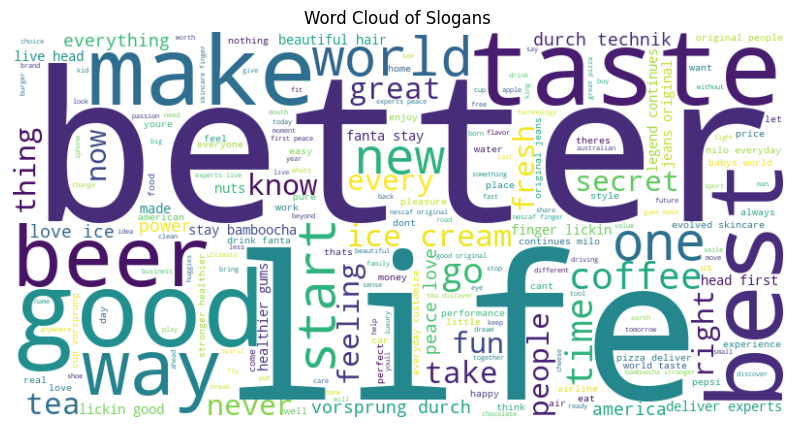

In [35]:
# Создание текстовой строки из всех слоганов
slogans_text = ' '.join(df['Slogan'].dropna().values)

# Генерация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(slogans_text)

# Отображение облака слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Slogans')
plt.show()

In [36]:
# Сохранение DataFrame в файл формата txt
df.to_csv('output.txt', sep='\t', index=False)


In [37]:
filename = "output.txt"
raw_text = open(filename).read()

### Создание словаря, который отображает уникальные символы в целочисленные значения

In [38]:

# Создание списка уникальных символов из строки `raw_text`
chars = sorted(list(set(raw_text)))

# Создание словаря `char_to_int`, где символы являются ключами,
# а их целочисленные представления (индексы в списке `chars`) являются значениями
char_to_int = dict((c, i) for i, c in enumerate(chars))

# Создание словаря `int_to_char`, где целочисленные значения (индексы в списке `chars`) являются ключами,
# а соответствующие символы являются значениями
int_to_char = dict((i, c) for i, c in enumerate(chars))

### Определение количества символов и размера словаря

In [39]:
# Вычисление общего количества символов в исходном тексте
n_chars = len(raw_text)

# Вычисление размера словаря, то есть количество уникальных символов
n_vocab = len(chars)

# Вывод информации о количестве символов и размере словаря
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  115036
Total Vocab:  29


### Подготовка набора данных входных и выходных пар, закодированных в виде целых чисел

In [40]:
# Определение длины последовательности (количество символов во входной последовательности)
seq_length = 100

# Создание списков для хранения входных и выходных данных
dataX = []  # Входные данные
dataY = []  # Выходные данные

# Создание пар вход-выход для каждой последовательности
for i in range(0, n_chars - seq_length, 1):
    # Получение входной последовательности длиной seq_length
    seq_in = raw_text[i:i + seq_length]
    # Получение символа, следующего за входной последовательностью
    seq_out = raw_text[i + seq_length]
    # Преобразование символов в числовые значения и добавление в соответствующие списки
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])

# Вычисление общего количества пар вход-выход
n_patterns = len(dataX)

# Вывод информации о количестве пар вход-выход
print("Total Patterns: ", n_patterns)

Total Patterns:  114936


In [41]:
# Изменение формы массива dataX в формат [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))

# Нормализация
X = X / float(n_vocab)

# Преобразование целочисленных меток dataY в формат "one-hot encoding" (единичное кодирование)
y = np_utils.to_categorical(dataY)

## Создание модели

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [43]:
# Объявление LSTM модели

# Создается объект модели типа Sequential.
model = Sequential()

# Добавляется слой LSTM с 256 нейронами
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))

# Добавляется слой Dropout с коэффициентом отсева 0.2.
model.add(Dropout(0.2))

# Добавляется второй слой LSTM с 256 нейронами
model.add(LSTM(256))

# Добавляется еще один слой Dropout с коэффициентом отсева 0.2.
model.add(Dropout(0.2))

# Добавляется полносвязный слой (Dense) с количеством нейронов, равным количеству уникальных символов в выходных данных 'y'
model.add(Dense(y.shape[1], activation='softmax'))

# Компилируется модель с функцией потерь "categorical_crossentropy" и оптимизатором "adam"
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Обучение модели

In [44]:
from keras.callbacks import ModelCheckpoint

In [45]:
# Определение контрольной точки которая позволяет сохранять веса модели в процессе обучения

# Определяется путь и формат имени файла для сохранения весов модели
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"

# Создается объект контрольной точки ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

# Создается список обратных вызовов (callbacks), содержащий только контрольную точку
callbacks_list = [checkpoint]

In [277]:
# Обучение модели
model.fit(X, y, epochs=30, batch_size=64, callbacks=callbacks_list)

Epoch 1/30
1278/1278 [==============================] - ETA: 0s - loss: 2.8448
Epoch 1: loss improved from inf to 2.84479, saving model to weights-improvement-01-2.8448.hdf5
1278/1278 [==============================] - 1135s 885ms/step - loss: 2.8448
Epoch 2/30
1278/1278 [==============================] - ETA: 0s - loss: 2.6285
Epoch 2: loss improved from 2.84479 to 2.62853, saving model to weights-improvement-02-2.6285.hdf5
1278/1278 [==============================] - 1160s 908ms/step - loss: 2.6285
Epoch 3/30
1278/1278 [==============================] - ETA: 0s - loss: 2.4687
Epoch 3: loss improved from 2.62853 to 2.46872, saving model to weights-improvement-03-2.4687.hdf5
1278/1278 [==============================] - 1159s 907ms/step - loss: 2.4687
Epoch 4/30
1278/1278 [==============================] - ETA: 0s - loss: 2.3369
Epoch 4: loss improved from 2.46872 to 2.33692, saving model to weights-improvement-04-2.3369.hdf5
1278/1278 [==============================] - 1195s 935ms/step

## Генерация текста

In [76]:
import sys
import pyfiglet

In [47]:
# Загрузка весов предварительно сохраненной модели
filename = "weights-improvement-49-1.1400.hdf5"
model.load_weights(filename)

# Модель компилируется с теми же параметрами, что и ранее
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Продолжение обучения с 30 до 50 эпох
model.fit(X, y, initial_epoch=30, epochs=50, batch_size=64, callbacks=callbacks_list)

In [72]:
def remove_single_letters(string):
    words = string.split()  # Разделение строки на слова
    filtered_words = []

    for word in words:
        if len(word) > 1:  # Проверка, что слово содержит более одной буквы
            filtered_words.append(word)

    return ' '.join(filtered_words)  # Объединение отфильтрованных слов в строку с пробелами

"Seed" (начальная последовательность) используется для инициализации генерации текста. Это случайно выбранная последовательность символов из обучающих данных, которая будет использоваться в качестве начального входа для модели

In [49]:
start = numpy.random.randint(10, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

Seed:
" t nutella 
new balancen is for fit
 perform better
achieve new balance
there are two motivations in  "


In [69]:
user_input = int(input("Введите кол-во слоганов: "))
#seed = [char_to_int[char] for char in user_input]

In [79]:
# Генерация последовательности символов с использованием обученной модели
for k in range(user_input):
    generatedtxt = ""
    # Генерация последовательности символов с использованием обученной модели
    for i in range(50):
        #x представляет собой текущий паттерн, преобразованный в форму (1, len(pattern), 1),
	#  чтобы соответствовать входному формату модели
        x = numpy.reshape(pattern, (1, len(pattern), 1))
        # x нормализуется путем деления на значение float(n_vocab)
        x = x / float(n_vocab)
        # prediction содержит предсказание модели для текущего паттерна
        prediction = model.predict(x, verbose=0)
        # index содержит индекс символа с наибольшей вероятностью из предсказания
        index = numpy.argmax(prediction)
        # result содержит символ, соответствующий index, из словаря int_to_char
        result = int_to_char[index]
        # seq_in содержит список символов текущего паттерна.
        seq_in = [int_to_char[value] for value in pattern]
        generatedtxt += result
        #pattern обновляется путем добавления index в конец и удаления первого элемента, 
	# чтобы подготовить следующий паттерн для генерации следующего символа.
        pattern.append(index)
        pattern = pattern[1:len(pattern)]
        
    
    
    print(remove_single_letters(generatedtxt))

seal can tea lite for the best sarte from the
ay you like jot more what is takes to be there
ont nn eleges it complete are you up and tell the
worlds most wanted wien youre into get on its tay
you lake the soad and ereams and alerica an airlin
